In [1]:
def read_from_cleaned_file(file_name):
    with open(file_name, "r") as f:
        content_as_list = []
        content_as_str = []
        for line in f:
            print(line)
            line_str = line.strip()
            line_list = line_str.split()
            content_as_list.append(line_list)
            content_as_str.append(line_str)
    f.close()
    return (content_as_list, content_as_str)

In [2]:
(list_w, y) = \
    read_from_cleaned_file('test_no_stem.txt')

cartilage regeneration requires balance anabolic catabolic processes examine susceptibility fibromodulin fmod lumican lum degradation mmp13 adamts4 adamts5 three major degradative proteinases articular cartilage cartilage development osteoarthritis immunolocalization fmod lum fetal foot adult knee cartilages using fmod matrix metalloprotease mmp13 neoepitope antibody tsyg11 cterminal antifmod pr184 antilum pr353 antibodies vitro digestion knee cartilage mmp13 disintegrin metalloprotease thrompospondin motifs adamts4 adamts5 assess whether fmod lum fragments observed western blots total knee replacement specimens could generated normal ovine articular cartilage explants cultured interleukin il1 oncostatinm osm pge3162689 broad spectrum mmp inhibitor assess fmod lum collagen degradation fmod lum immunolocalized metatarsal phalangeal fetal rudiment cartilages growth plates antibody tsyg11 localized mmp13cleaved fmod hypertrophic chondrocytes metatarsal growth plates fmod prominently local

In [3]:
list_w

[['cartilage',
  'regeneration',
  'requires',
  'balance',
  'anabolic',
  'catabolic',
  'processes',
  'examine',
  'susceptibility',
  'fibromodulin',
  'fmod',
  'lumican',
  'lum',
  'degradation',
  'mmp13',
  'adamts4',
  'adamts5',
  'three',
  'major',
  'degradative',
  'proteinases',
  'articular',
  'cartilage',
  'cartilage',
  'development',
  'osteoarthritis',
  'immunolocalization',
  'fmod',
  'lum',
  'fetal',
  'foot',
  'adult',
  'knee',
  'cartilages',
  'using',
  'fmod',
  'matrix',
  'metalloprotease',
  'mmp13',
  'neoepitope',
  'antibody',
  'tsyg11',
  'cterminal',
  'antifmod',
  'pr184',
  'antilum',
  'pr353',
  'antibodies',
  'vitro',
  'digestion',
  'knee',
  'cartilage',
  'mmp13',
  'disintegrin',
  'metalloprotease',
  'thrompospondin',
  'motifs',
  'adamts4',
  'adamts5',
  'assess',
  'whether',
  'fmod',
  'lum',
  'fragments',
  'observed',
  'western',
  'blots',
  'total',
  'knee',
  'replacement',
  'specimens',
  'could',
  'generated',

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


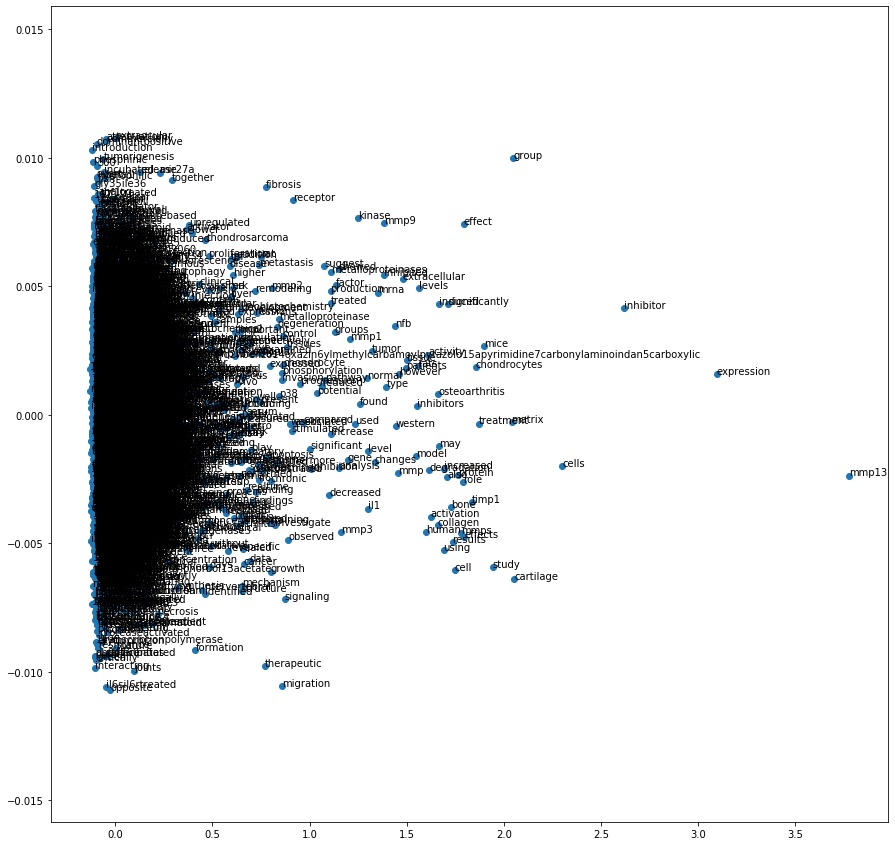

In [65]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
# define training data
plt.figure(figsize=(15,15))
sentences = list_w
# train model
model = Word2Vec(sentences, min_count=1, workers=4)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

In [64]:
model.most_similar('mmp13')[:5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('expression', 0.9999311566352844),
 ('cells', 0.9998850226402283),
 ('inhibitor', 0.9998812079429626),
 ('treatment', 0.9998687505722046),
 ('timp1', 0.9998605847358704)]

In [45]:
def cosine_distance (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model[word]
    for item in target_list :
        for it in item:
            if it != word :
                b = model[it]
                cos_sim = dot(a, b)/(norm(a)*norm(b))
                cosine_dict[it] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]# only get the unique Maker_Model

In [46]:
from numpy import dot
from numpy.linalg import norm

In [58]:
Cos_dist = list(list_w) # most similar class by cosine distance 
cosine_distance (model,'inhibitor',Cos_dist,5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


[('expression', 0.9998983),
 ('mmp13', 0.9998773),
 ('cells', 0.999848),
 ('inhibitors', 0.9998321),
 ('mice', 0.99983126)]

In [56]:
import numpy as np
from sklearn.manifold import TSNE

In [52]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    
    close_words = model.similar_by_word(word)
    
    
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


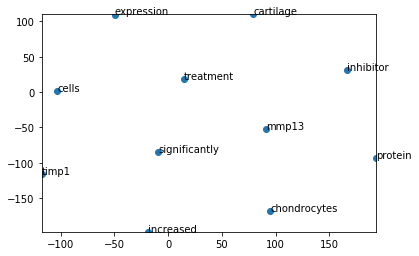

In [57]:
display_closestwords_tsnescatterplot(model, 'mmp13', 100) 